# Covid in Spain vs France. Updated every 24 hours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get Covid Data from OurWorldInData DataBase. Updated every 24h

In [2]:
covid_df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", parse_dates=["date"], index_col="date")
covid_df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
spain = covid_df[covid_df.iso_code == "ESP"].copy()
spain.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2022-03-27,ESP,Europe,Spain,11451676.0,0.0,18148.429,102392.0,NaN,NaN,244980.732,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
2022-03-28,ESP,Europe,Spain,11451676.0,0.0,18148.429,102392.0,NaN,NaN,244980.732,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
2022-03-29,ESP,Europe,Spain,11508309.0,56633.0,18503.571,102218.0,NaN,NaN,246192.257,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
2022-03-30,ESP,Europe,Spain,11508309.0,NaN,NaN,102218.0,NaN,NaN,246192.257,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
2022-03-31,ESP,Europe,Spain,11508309.0,NaN,NaN,102218.0,NaN,NaN,246192.257,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN


In [4]:
france = covid_df[covid_df.iso_code == "FRA"].copy()
france.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2022-03-27,FRA,Europe,France,25082393.0,110174.0,127495.000,141741.0,41.0,105.571,372020.898,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2022-03-28,FRA,Europe,France,25111975.0,29582.0,128259.429,141890.0,149.0,105.143,372459.657,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2022-03-29,FRA,Europe,France,25329455.0,217480.0,133502.714,142054.0,164.0,109.571,375685.310,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2022-03-30,FRA,Europe,France,25498479.0,169024.0,135641.286,142203.0,149.0,114.571,378192.267,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2022-03-31,FRA,Europe,France,25668176.0,169697.0,139863.571,142342.0,139.0,118.571,380709.205,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN


In [5]:
spain_filtered = spain[["new_cases_smoothed", "new_deaths_smoothed", "weekly_hosp_admissions"]]
spain_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 790 entries, 2020-02-01 to 2022-03-31
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   new_cases_smoothed      754 non-null    float64
 1   new_deaths_smoothed     726 non-null    float64
 2   weekly_hosp_admissions  601 non-null    float64
dtypes: float64(3)
memory usage: 24.7 KB


In [11]:
france_filtered = france[["new_cases_smoothed", "new_deaths_smoothed", "weekly_hosp_admissions"]]
france_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 798 entries, 2020-01-24 to 2022-03-31
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   new_cases_smoothed      733 non-null    float64
 1   new_deaths_smoothed     723 non-null    float64
 2   weekly_hosp_admissions  737 non-null    float64
dtypes: float64(3)
memory usage: 24.9 KB


### Clean data

In [7]:
#Replace negative numbers with nan
spain_filtered.loc[spain_filtered['new_cases_smoothed'] < 0, 'new_cases_smoothed']=np.nan
spain_filtered.loc[spain_filtered['new_deaths_smoothed'] < 0, 'new_deaths_smoothed']=np.nan

france_filtered.loc[france_filtered['new_cases_smoothed'] < 0, 'new_cases_smoothed']=np.nan
france_filtered.loc[france_filtered['new_deaths_smoothed'] < 0, 'new_deaths_smoothed']=np.nan

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [8]:
#Forward fill nans
spain_filtered = spain_filtered.fillna(method="ffill")

france_filtered = france_filtered.fillna(method="ffill")

## Visualizations

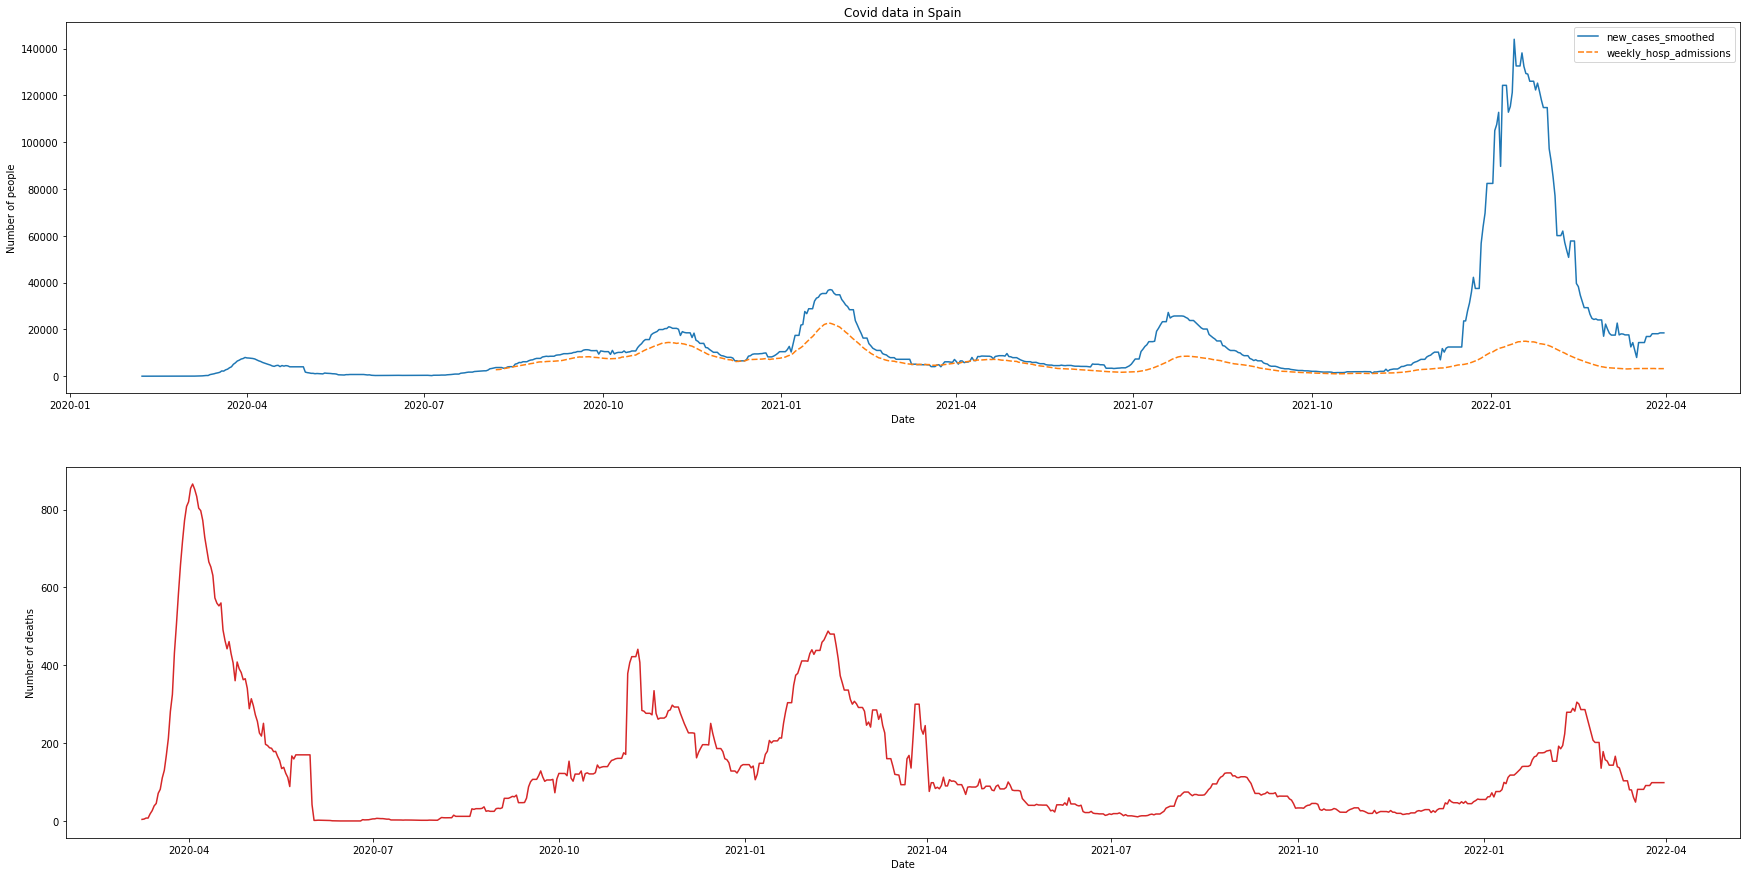

In [9]:
fig, ax = plt.subplots(nrows=2, figsize=(30, 15))
sns.lineplot(data=spain_filtered[["new_cases_smoothed","weekly_hosp_admissions"]], ax=ax[0])
sns.lineplot(data=spain_filtered["new_deaths_smoothed"], color='tab:red', ax=ax[1])
ax[0].set_title("Covid data in Spain")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number of people")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of deaths")
plt.show()

## Interactive Visualizations

In [12]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [13]:
spain_filtered[["new_cases_smoothed","weekly_hosp_admissions"]].plot_bokeh.line(sizing_mode='stretch_both')

Figure(id='1003', ...)

In [15]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [16]:
# Creating trace1
trace1 = go.Scatter(
                    x = spain_filtered.index,
                    y = spain_filtered["new_cases_smoothed"],
                    mode = "lines",
                    name = "Spain: New Cases",
                    marker = dict(color = 'yellow'),
                    text= spain_filtered["new_cases_smoothed"])
# Creating trace2
trace2 = go.Scatter(
                    x = spain_filtered.index,
                    y = spain_filtered["weekly_hosp_admissions"],
                    mode = "lines",
                    name = "Spain: New Hospitalizations",
                    marker = dict(color = 'blue'),
                    text= spain_filtered["weekly_hosp_admissions"])
trace3 = go.Scatter(
                    x = spain_filtered.index,
                    y = spain_filtered["new_deaths_smoothed"],
                    mode = "lines",
                    name = "Spain: New Deaths",
                    marker = dict(color = 'green'),
                    text= spain_filtered["new_deaths_smoothed"])
trace4 = go.Scatter(
                    x = france_filtered.index,
                    y = france_filtered["new_cases_smoothed"],
                    mode = "lines",
                    name = "France: New Cases",
                    marker = dict(color = 'red'),
                    text= france_filtered["new_cases_smoothed"])
# Creating trace2
trace5 = go.Scatter(
                    x = france_filtered.index,
                    y = france_filtered["weekly_hosp_admissions"],
                    mode = "lines",
                    name = "France: New Hospitalizations",
                    marker = dict(color = 'purple'),
                    text= france_filtered["weekly_hosp_admissions"])
trace6 = go.Scatter(
                    x = france_filtered.index,
                    y = france_filtered["new_deaths_smoothed"],
                    mode = "lines",
                    name = "France: New Deaths",
                    marker = dict(color = 'grey'),
                    text= france_filtered["new_deaths_smoothed"])
data = [trace1, trace4, trace2, trace5, trace3, trace6]
layout = dict(title = 'Covid 19: Cases - Deaths - Hospitalizations',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## Plot Country from imput

In [19]:
inp = input("Please enter a valid country code:")
inp = inp.upper()
print(inp)

USA


In [20]:
country = covid_df[covid_df["iso_code"] == inp].copy()
if country.empty:
    print("Country code doesnt exist! :(")
else:
    country_filtered = country[["new_cases_smoothed", "new_deaths_smoothed", "weekly_hosp_admissions"]] 
    spain_filtered.loc[spain_filtered['new_cases_smoothed'] < 0, 'new_cases_smoothed']=np.nan
    spain_filtered.loc[spain_filtered['new_deaths_smoothed'] < 0, 'new_deaths_smoothed']=np.nan
    spain_filtered = spain_filtered.fillna(method="ffill")

    # Creating trace1
    trace1 = go.Scatter(
                        x = country_filtered.index,
                        y = country_filtered["new_cases_smoothed"],
                        mode = "lines",
                        name = inp + ": New Cases",
                        marker = dict(color = 'yellow'),
                        text= country_filtered["new_cases_smoothed"])
    # Creating trace2
    trace2 = go.Scatter(
                        x = country_filtered.index,
                        y = country_filtered["weekly_hosp_admissions"],
                        mode = "lines",
                        name = inp + ": New Hospitalizations",
                        marker = dict(color = 'blue'),
                        text= country_filtered["weekly_hosp_admissions"])
    trace3 = go.Scatter(
                        x = country_filtered.index,
                        y = country_filtered["new_deaths_smoothed"],
                        mode = "lines",
                        name = inp + ": New Deaths",
                        marker = dict(color = 'orange'),
                        text= country_filtered["new_deaths_smoothed"])
    trace4 = go.Scatter(
                        x = spain_filtered.index,
                        y = spain_filtered["new_cases_smoothed"],
                        mode = "lines",
                        name = "Spain: New Cases",
                        marker = dict(color = 'red'),
                        text= spain_filtered["new_cases_smoothed"])
    # Creating trace2
    trace5 = go.Scatter(
                        x = spain_filtered.index,
                        y = spain_filtered["weekly_hosp_admissions"],
                        mode = "lines",
                        name = "Spain: New Hospitalizations",
                        marker = dict(color = 'green'),
                        text= spain_filtered["weekly_hosp_admissions"])
    trace6 = go.Scatter(
                        x = spain_filtered.index,
                        y = spain_filtered["new_deaths_smoothed"],
                        mode = "lines",
                        name = "Spain: New Deaths",
                        marker = dict(color = 'pink'),
                        text= spain_filtered["new_deaths_smoothed"])
    
    data = [trace1, trace4, trace2, trace5, trace3, trace6]
    layout = dict(title = 'Covid 19: Cases - Deaths - Hospitalizations',
                xaxis= dict(title= 'Date',ticklen= 5,zeroline= False)
                )
    fig = dict(data = data, layout = layout)
    iplot(fig)